In [35]:
from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [37]:
data2=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train_1.csv',encoding='latin-1')
data2.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [38]:
data2.size

299967

In [39]:
#cleaning the data
import re
data2['SentimentText'].head()
data2['SentimentText']=data2['SentimentText'].apply(lambda x:str(x).lower())
data2['SentimentText']=data2['SentimentText'].apply(lambda x:re.sub('[^a-zA-z0-9\s]','',x))
indexs=data2[data2["SentimentText"]=="not available"].index
data2.drop(indexs , inplace=True)
data2.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my apl friend
1,2,0,i missed the new moon trailer
2,3,1,omg its already 730 o
3,4,0,omgaga im sooo im gunna cry ive be...
4,5,0,i think mi bf is cheating on me ...


In [0]:

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D ,Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
max_fature=2000
tokenizer=Tokenizer(num_words=max_fature,split=' ')
#print(tokenizer)
Y=tokenizer.fit_on_texts(data2['SentimentText'].values)
#print(Y)
X = tokenizer.texts_to_sequences(data2['SentimentText'].values)
X = pad_sequences(X)


In [41]:
embed_dim = 100
lstm_out = 256

model = Sequential()
Z=model.add(Embedding(max_fature, embed_dim,input_length = X.shape[1]))

'''
    this layer creates an embedding matrix
'''

model.output_shape

(None, 84, 100)

In [42]:
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5,return_sequences=True))
model.add(LSTM(lstm_out,dropout=0.5,recurrent_dropout=0.5))
model.add(Dense(100))
model.add(Dense(2,activation='relu'))
model.compile(loss = 'mean_squared_error', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 84, 100)           200000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 84, 256)           365568    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 202       
Total params: 1,116,782
Trainable params: 1,116,782
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
Y=pd.get_dummies(data2['Sentiment'].values)
Y.head()

,0,1
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train)
print(X_train.shape)

[[  0   0   0 ... 124  41   6]
 [  0   0   0 ... 808   4 512]
 [  0   0   0 ...  43 984 327]
 ...
 [  0   0   0 ... 377   8 509]
 [  0   0   0 ...  41   6 285]
 [  0   0   0 ...   3 382  45]]
(79991, 84)


In [45]:
from keras.callbacks import ModelCheckpoint

batch_size = 512
filename = 'model_31.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history=model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, validation_split = 0.2,callbacks=[checkpoint], verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 63992 samples, validate on 15999 samples
Epoch 1/20
63992/63992 [==============================] - 40s 628us/step - loss: 0.2334 - accuracy: 0.6416 - val_loss: 0.1770 - val_accuracy: 0.7365

Epoch 00001: val_loss improved from inf to 0.17698, saving model to model_31.h5
Epoch 2/20
63992/63992 [==============================] - 39s 616us/step - loss: 0.1737 - accuracy: 0.7497 - val_loss: 0.1663 - val_accuracy: 0.7552

Epoch 00002: val_loss improved from 0.17698 to 0.16625, saving model to model_31.h5
Epoch 3/20
63992/63992 [==============================] - 40s 624us/step - loss: 0.1653 - accuracy: 0.7623 - val_loss: 0.1656 - val_accuracy: 0.7580

Epoch 00003: val_loss improved from 0.16625 to 0.16564, saving model to model_31.h5
Epoch 4/20
63992/63992 [==============================] - 40s 623us/step - loss: 0.1621 - accuracy: 0.7681 - val_loss: 0.1645 - val_accuracy: 0.7592

Epoch 00004: val_loss improved from 0.16564 to 0.16453, saving model to model_31.h5
Epoch 5/20
63992/6

In [46]:
model.evaluate(X_test,Y_test,verbose=1)

19998/19998 [==============================] - 16s 795us/step


[0.17040084646080528, 0.7602760195732117]

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


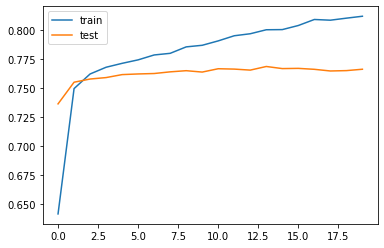

In [47]:
from keras.models import load_model
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','test'])
plt.show()

In [48]:
from keras.models import load_model
import matplotlib.pyplot as plt

model=load_model('model_31.h5')


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


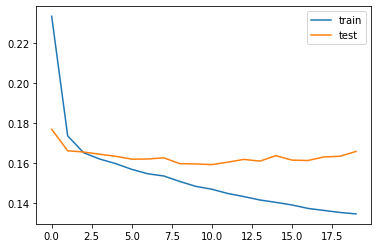

In [49]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','test'])
plt.show()


In [50]:
twt = ['Hehehe']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=84, dtype='int32', value=0)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif(np.argmax(sentiment) == 1):
    print("positive")

negative


In [51]:
print(twt)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0 123]]
